# Data Science Capstone Final Project - Fan Friendly FoodBall

## Install Libraries

In [1]:
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup


## Process NFL Team and Stadium Data

In [2]:
# Read NFL Stadium and Stats list compiled from Wikipedia and other sources
url='https://raw.githubusercontent.com/ptdanner/Coursera_Capstone/master/NFLStadiums2.csv'
nfl_df=pd.read_csv(url,error_bad_lines=False)
nfl_df

,Team,Division,Stadium,Capacity,WinPerc,Address
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,500 E Veterans Way: Tempe: AZ 85287
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,409 Nelson St SW: Atlanta: GA 30313
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,1101 Russell Street: Baltimore: MD 21230
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,One Bills Drive: Orchard Park: NY 14127
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,800 South Mint Street: Charlotte: NC 28202
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,1005 S 4th St: Minneapolis: MN 55415
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,Cincinnati: OH 45202
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,Cleveland: OH 44114
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,One AT&T Way: Arlington: TX 76011
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,1701 Bryant St: Denver: CO 80204


### Clean Stadium List Address Column

In [3]:
nfl_df['Address'] = nfl_df['Address'].str.replace(':', ',')
nfl_df.head(10)

,Team,Division,Stadium,Capacity,WinPerc,Address
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287"
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313"
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230"
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127"
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202"
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415"
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202"
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114"
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011"
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204"


### Get Shape of Stadium List

In [4]:
count_row = nfl_df.shape[0]
print(count_row)

32


### Get Latitude and Longitude for Stadiums

In [5]:
# Find longitude and latitude values for every Stadium Postal address. We will be brave enough to use the Geocoder package...

geolocator = Nominatim(user_agent="stad_explorer")

for i in range(len(nfl_df)):
    address = nfl_df.loc[i,'Address']
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        nfl_df.loc[i,'latitude']=location.latitude
        nfl_df.loc[i,'longitude']=location.longitude
        print('The geograpical coordinates are {}, {},{}.'.format(location, latitude, longitude))

    except:
        print("Exception on: {} ".format(address)) #Look for Addresses with missing coordinates
        pass
        


The geograpical coordinates are Sun Devil Stadium, 500, East Veterans Way, Tempe, Maricopa County, Arizona, 8587, United States, 33.42655155,-111.93327690688318.
The geograpical coordinates are Nelson Street Southwest, Castleberry Hill, Atlanta, Georgia, 30313, United States, 33.751282,-84.399564.
The geograpical coordinates are M&T Bank Stadium, 1101, Russell Street, Ridgely's Delight, Baltimore, Maryland, 21230, United States, 39.2779664,-76.62380930835468.
The geograpical coordinates are Bills Drive, Orchard Park, Erie County, New York, 14127, United States, 42.7713413,-78.7873628.
The geograpical coordinates are Bank of America Stadium, 800, South Mint Street, Third Ward, 3rd Ward, Charlotte, Mecklenburg County, North Carolina, 28202, United States, 35.2258352,-80.8517716961349.
The geograpical coordinates are South 4th Street, Minneapolis, Hennepin County, Minnesota, 55415, United States, 44.9742421,-93.2557798.
The geograpical coordinates are Cincinnati, Hamilton County, Ohio, Un

In [6]:
nfl_df

,Team,Division,Stadium,Capacity,WinPerc,Address,latitude,longitude
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287",33.426552,-111.933277
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313",33.751282,-84.399564
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230",39.277966,-76.623809
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127",42.771341,-78.787363
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202",35.225835,-80.851772
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415",44.974242,-93.255780
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202",39.101454,-84.512460
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114",41.505161,-81.693445
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011",32.752953,-97.087837
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204",39.743952,-105.019223


In [7]:
#TEST FOR EXCEPTION ADDRESSES DELETE ME LATER

address ='302 W 3rd St, Cincinnati, OH 45202'
geolocator = Nominatim(user_agent="stad_explorer")
location = geolocator.geocode(address)
print('The geograpical coordinates are {}.'.format(location))

The geograpical coordinates are AL Neyer, 302, West 3rd Street, Cincinnati, Hamilton County, Ohio, 45202, United States.


## Map Stadium Locations

In [8]:
# library to handle JSON files
import json 

# library to handle requests
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import folium for map rendering library
!pip install folium
import folium 

print('Libraries imported.')

     |████████████████████████████████| 93 kB 3.2 MB/s  eta 0:00:01
Libraries imported.


### Use Folium for Mapping

In [9]:
# create map of USA using latitude and longitude values
map_nfl = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, team, stadium in zip(nfl_df['latitude'], nfl_df['longitude'], nfl_df['Team'], nfl_df['Stadium']):
    try:
        label = '{}, {}'.format(team, stadium)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_nfl)  
    except:
        pass
map_nfl

## Retrieve Venue Information

### Define Foursquare settings

In [10]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS' # your Foursquare ID
CLIENT_SECRET = 'YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS
CLIENT_SECRET:YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK


### Retrieve all Foursquare Venue Categories

In [11]:
#Create URL to retrieve all categories
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
#Send the GET request and examine the results
results_cat = requests.get(url).json()
results_cat

{'meta': {'code': 200, 'requestId': '5fd6507094a8241c14785025'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

### Parse Venue Categories JSON

In [12]:
# assign relevant part of JSON to venues
categories = results_cat['response']['categories']
categories
# tranform categories into a dataframe
dataframe_cat = pd.json_normalize(categories)
dataframe_cat.head()
# filter for only Food
dataframe_cat_food = dataframe_cat[dataframe_cat['name']=='Food']
dataframe_cat_food
categoriestext = dataframe_cat_food.loc[3,'categories']
categoriestext
dataframe_subcat = pd.json_normalize(categoriestext)
dataframe_subcat.shape
categorylist = dataframe_subcat['name'].tolist()

#type(mylist)
categorylist

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Armenian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bangladeshi Restaurant',
 'Belgian Restaurant',
 'Bistro',
 'Breakfast Spot',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Creperie',
 'Czech Restaurant',
 'Deli / Bodega',
 'Dessert Shop',
 'Diner',
 'Donut Shop',
 'Dumpling Restaurant',
 'Dutch Restaurant',
 'Eastern European Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'Fondue Restaurant',
 'Food Court',
 'Food Stand',
 'Food Truck',
 'French Restaurant',
 'Fried Chicken Joint',
 'Friterie',
 'Gastropub',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 '

In [13]:
#DELETEME# function that extracts the categories name and parents
#def get_category_type(row):
#    try:
#        categories_list = row['categories']
#    except:
#        categories_list = row['venue.categories']
        
#    if len(categories_list) == 0:
#        return None
#    else:
#        return categories_list[0]['name']

In [14]:
#nfl_df.loc[1,'Team']
#stadium_latitude = nfl_df.loc[1, 'latitude'] # stadium latitude value
#stadium_longitude = nfl_df.loc[1, 'longitude'] # stadium longitude value

#stadium_name = nfl_df.loc[1, 'Stadium'] # stadium name

#print('Latitude and longitude values of {} are {}, {}.'.format(stadium_name, 
#                                                               stadium_latitude, 
#                                                               stadium_longitude))

In [15]:
#HERE#####TEST FOR CATEGORY SEARCH
#address = '102 North End Ave, New York, NY'

#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print(latitude, longitude)
#search_query = 'Food'
#radius = 1000
#print(search_query + ' .... OK!')
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url
#results = requests.get(url).json()
#results
# assign relevant part of JSON to venues
#venues = results['response']['venues']
#venues
# tranform venues into a dataframe
#dataframe = json_normalize(venues)
#dataframe.head()

In [16]:
####CONTINUE TEST
# keep only columns that include venue name, and anything that is associated with location
#filtered_columns = ['name', 'categories','id'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
#dataframe_filtered = dataframe.loc[:, filtered_columns]
#dataframe_filtered

In [17]:
####CONTINUE TEST

# function that extracts the category of the venue
#def get_category_type(row):
#    try:
#        categories_list = row['categories']
#    except:
#        categories_list = row['venue.categories']
        
#    if len(categories_list) == 0:
#        return None
#    else:
#        return categories_list[0]['name']

# filter the category for each row
#dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
#dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered

### Retrieve Venues surrounding One Stadium

In [18]:
nfl_df.loc[1,'Team']
stadium_latitude = nfl_df.loc[1, 'latitude'] # stadium latitude value
stadium_longitude = nfl_df.loc[1, 'longitude'] # stadium longitude value

stadium_name = nfl_df.loc[1, 'Stadium'] # stadium name

print('Latitude and longitude values of {} are {}, {}.'.format(stadium_name, 
                                                               stadium_latitude, 
                                                               stadium_longitude))

Latitude and longitude values of Mercedes-Benz Stadium are 33.751282, -84.399564.


In [19]:
#Get the top 100 venues within a radius of 1000 meters.

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    stadium_latitude, 
    stadium_longitude, 
    radius, 
    LIMIT)
url # display URL

#Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd650866713ee22166f01c4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Castleberry Hill',
  'headerFullLocation': 'Castleberry Hill, Atlanta',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 33.760282009000015,
    'lng': -84.38875982973471},
   'sw': {'lat': 33.74228199099999, 'lng': -84.41036817026529}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0dd396f964a520de5023e3',
       'name': 'Wine Shoe',
       'location': {'address': '339 Nelson St SW',
        'lat': 33.75155944634878,
        'lng': -84.39893717875819,
        'labeledLatL

#### Put Single Stadium Venues in Dataframe

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.id','venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues


,name,id,categories,lat,lng
0,Wine Shoe,4b0dd396f964a520de5023e3,Wine Shop,33.751559,-84.398937
1,Bottle Rocket,4a836c8ff964a5201bfb1fe3,Sushi Restaurant,33.750109,-84.400979
2,ZuCot Gallery,4ac6c860f964a52042b620e3,Art Gallery,33.752463,-84.399011
3,Elliott Street Deli & Pub,49f2218cf964a520f3691fe3,Dive Bar,33.753248,-84.398144
4,Atlanta Movie Tours,4fef03a2e4b05dce3a2f5576,Moving Target,33.751586,-84.398570
...,...,...,...,...,...
79,Fed Ex Office Georgia World Congress Center,4fc8cdd8e4b0681a47e579fa,Paper / Office Supplies Store,33.744176,-84.398324
80,John Hope Community Center,5321c4aa498e0b72057ec5a1,Community Center,33.747533,-84.407100
81,Hidden Treasures,5399f694498e9ff3736baf78,Smoke Shop,33.743988,-84.403767
82,Murrell's At Scholar,4f32872719836c91c7e0942f,Food,33.755150,-84.409019


In [22]:
#### Filter Single Stadium Venues to Food

In [23]:
nearby_food = nearby_venues[nearby_venues['categories'].isin(categorylist)]
nearby_food

,name,id,categories,lat,lng
5,No Mas! Cantina,4a4564c1f964a52020a81fe3,Mexican Restaurant,33.749785,-84.400847
11,Old Lady Gang,58d71061ecb67e3da5248c0f,Southern / Soul Food Restaurant,33.749664,-84.399405
12,ADios Cafe,49fedd7df964a520af6f1fe3,Café,33.750037,-84.400994
15,Dat Fire Jerk Chicken,56466157498e954762ce1bda,Caribbean Restaurant,33.748248,-84.404748
18,Fox Bros Bar-B-Q & Brew,5a1afbb2dee7706a7bf38412,BBQ Joint,33.755600,-84.399526
20,Kevin Gillespees’s Gamechangers,59f2768416fa0431168d1084,Restaurant,33.755220,-84.400736
23,Chick-fil-A,596e9b0d419a9e73cd324147,Fast Food Restaurant,33.754853,-84.403203
26,Chick-fil-A,58d4374824ca6a01652379a4,Fast Food Restaurant,33.758782,-84.398699
28,Jamrock Restaurant,4c40e04eaf052d7f16817c79,Caribbean Restaurant,33.751554,-84.391356
33,Murrell's Cafe,531f1c8f498e541864e036de,Buffet,33.754005,-84.409473


In [24]:
nearby_venues.shape

(84, 5)

## Get Venues for All Stadiums

### Define Function That Returns Explored Venues

In [25]:

def getNearbyVenues(names, divisions, stadiums, capacities, winpercs, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, division, stadium, capacity, winperc, lat, lng in zip(names, divisions, stadiums, capacities, winpercs, latitudes, longitudes):
        print(name)# To see progress of code
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            division,
            stadium,
            capacity,
            winperc,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Team',
                  'Divison',
                  'Stadium',
                  'Capacity',
                  'Win Perc',
                  'Stadium Latitude', 
                  'Stadium Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

In [26]:
#Now write the code to run the above function on each team and create a new dataframe called stadium_venues.
#Get the top 100 venues within a radius of 500 meters.


LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
stadium_venues = getNearbyVenues(names=nfl_df['Team'],
                                   divisions=nfl_df['Division'],
                                   stadiums=nfl_df['Stadium'],
                                   capacities=nfl_df['Capacity'],
                                   winpercs=nfl_df['WinPerc'],
                                   latitudes=nfl_df['latitude'],
                                   longitudes=nfl_df['longitude'],
                                   radius=750,
                                   limit = 100
                                  )

Arizona Cardinals
Atlanta Falcons
Baltimore Ravens
Buffalo Bills
Carolina Panthers
Chicago Bears
Cincinnati Bengals
Cleveland Browns
Dallas Cowboys
Denver Broncos
Detroit Lions
Green Bay Packers
Houston Texans
Indianapolis Colts
Jacksonville Jaguars
Kansas City Chiefs
Las Vegas Raiders
Los Angeles Chargers
Los Angeles Rams
Miami Dolphins
Minnesota Vikings
New England Patriots
New Orleans Saints
New York Giants
New York Jets
Philadelphia Eagles
Pittsburgh Steelers
San Francisco 49ers
Seattle Seahawks
Tampa Bay Buccaneers
Tennessee Titans
Washington Redskins


In [27]:
print(stadium_venues.shape)
stadium_venues.head()

(1741, 12)


,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Sun Devil Stadium,33.426396,-111.932393,College Stadium,4b155040f964a52036b023e3
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Postino Annex,33.423973,-111.934752,Wine Bar,54174fa7498e3d2a9d8dfaa4
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Bicycle Cellar,33.425728,-111.936436,Bike Shop,4c49b8373013a593566720e3
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"""A"" Mountain (Hayden Butte Preserve)",33.428380,-111.936718,Mountain,4b4a43f2f964a5206a8126e3


#### Filter All Venues to Food

In [28]:
nearby_food = stadium_venues[stadium_venues['Venue Category'].isin(categorylist)]
#rpt[rpt['STK_ID'].isin(stk_list)]

nearby_food.reset_index(drop=True, inplace=True)
nearby_food

,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948
...,...,...,...,...,...,...,...,...,...,...,...,...
569,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910
570,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e
571,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a
572,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75


### Test Retrieving Rating Data for Single Venue

In [29]:

#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Define Foursquare Credentials and Version
#CLIENT_ID = 'W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS' # your Foursquare ID
#CLIENT_SECRET = 'YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK' # your Foursquare Secret
#VERSION = '20180604'


# create URL
#url = 'https://api.foursquare.com/v2/venues/5b9076a41a29250025ad827a?&client_id={}&client_secret={}&v={}'.format(
#    CLIENT_ID, 
#    CLIENT_SECRET, 
#    VERSION)
#url # display URL

#Send the GET request and examine the results
#results = requests.get(url).json()
#results

In [30]:
# assign relevant part of JSON to venues
#venuedetails = results['response']['venue']
#venuedetails
# tranform venues into a dataframe
#dataframerating = pd.json_normalize(venuedetails)
#dataframerating.head()
#rating = dataframerating.loc[0,'rating']
#rating

### Get Ratings for All Food Venues

In [31]:
for i in range(len(nearby_food)):
#for i in range(48): # For testing
    venueid = nearby_food.loc[i,'Venue ID']
    print(venueid)
    try:
        
        # create URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venueid,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION
            )
        print(url) # display URL

        #Send the GET request and examine the results
        results = requests.get(url).json()
        results
        # assign relevant part of JSON to venues
        venuedetails = results['response']['venue']
        venuedetails
        # tranform venues into a dataframe
        dataframerating = json_normalize(venuedetails)
        #dataframerating.head()
        rating = dataframerating.loc[0,'rating']     
        
        nearby_food.loc[i,'Venue Rating']= rating
          

    except:
       # nearby_food.loc[i,'Venue Rating']= 33  #DELETE ME
        print("Exception on: {} ".format(venueid)) 
        pass

5489c1fe498ebda5dea9a9f1
https://api.foursquare.com/v2/venues/5489c1fe498ebda5dea9a9f1?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


5b9076a41a29250025ad827a
https://api.foursquare.com/v2/venues/5b9076a41a29250025ad827a?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4a692b83f964a520b5cb1fe3
https://api.foursquare.com/v2/venues/4a692b83f964a520b5cb1fe3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
51d1e3d4498ea96dd5fc8167
https://api.foursquare.com/v2/venues/51d1e3d4498ea96dd5fc8167?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4bf1d51999d02d7fdd9ec948
https://api.foursquare.com/v2/venues/4bf1d51999d02d7fdd9ec948?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5852a169d6fe9034fa333809
https://api.foursquare.com/v2/venues/5852a169d6fe9034fa333809?&client_id=W15FICLBVNUELUJBYT

56466157498e954762ce1bda
https://api.foursquare.com/v2/venues/56466157498e954762ce1bda?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5a1afbb2dee7706a7bf38412
https://api.foursquare.com/v2/venues/5a1afbb2dee7706a7bf38412?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
59f2768416fa0431168d1084
https://api.foursquare.com/v2/venues/59f2768416fa0431168d1084?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
596e9b0d419a9e73cd324147
https://api.foursquare.com/v2/venues/596e9b0d419a9e73cd324147?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5ae5ea6c5d891b002c9afa08
https://api.foursquare.com/v2/venues/5ae5ea6c5d891b002c9afa08?&client_id=W15FICLBVNUELUJBYT

576eb02b498e5c4439a993cd
https://api.foursquare.com/v2/venues/576eb02b498e5c4439a993cd?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
542db5ef498ec8da89c48f6b
https://api.foursquare.com/v2/venues/542db5ef498ec8da89c48f6b?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5ad2a278898bdc19764dbae2
https://api.foursquare.com/v2/venues/5ad2a278898bdc19764dbae2?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
55f9f25b498ee86a4d321164
https://api.foursquare.com/v2/venues/55f9f25b498ee86a4d321164?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b25a00ff964a520b67424e3
https://api.foursquare.com/v2/venues/4b25a00ff964a520b67424e3?&client_id=W15FICLBVNUELUJBYT

584b4500e9efba112ca2acca
https://api.foursquare.com/v2/venues/584b4500e9efba112ca2acca?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4be9a5df62c0c928f6e6dfd4
https://api.foursquare.com/v2/venues/4be9a5df62c0c928f6e6dfd4?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
528fcf0911d2e62de3f009c8
https://api.foursquare.com/v2/venues/528fcf0911d2e62de3f009c8?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4a932543f964a520f21e20e3
https://api.foursquare.com/v2/venues/4a932543f964a520f21e20e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4ed8e6b729c2b912268d93bd
https://api.foursquare.com/v2/venues/4ed8e6b729c2b912268d93bd?&client_id=W15FICLBVNUELUJBYT

4b5232f1f964a5204c6f27e3
https://api.foursquare.com/v2/venues/4b5232f1f964a5204c6f27e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
507a2452e4b0ce42c6bdef75
https://api.foursquare.com/v2/venues/507a2452e4b0ce42c6bdef75?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
54f49879498ee35c902f8ed1
https://api.foursquare.com/v2/venues/54f49879498ee35c902f8ed1?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5ae22dbb4c954c002cead32b
https://api.foursquare.com/v2/venues/5ae22dbb4c954c002cead32b?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
57e1a32e498e8e1645bd1d5e
https://api.foursquare.com/v2/venues/57e1a32e498e8e1645bd1d5e?&client_id=W15FICLBVNUELUJBYT

4ad4bff0f964a52021e920e3
https://api.foursquare.com/v2/venues/4ad4bff0f964a52021e920e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5d0a5e313fcee8002c2eb5c0
https://api.foursquare.com/v2/venues/5d0a5e313fcee8002c2eb5c0?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
504bc388e4b03e711f5c6b38
https://api.foursquare.com/v2/venues/504bc388e4b03e711f5c6b38?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
5273debf11d21f1806525f80
https://api.foursquare.com/v2/venues/5273debf11d21f1806525f80?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
576eb43e498e916f9c8b8ab2
https://api.foursquare.com/v2/venues/576eb43e498e916f9c8b8ab2?&client_id=W15FICLBVNUELUJBYT

58ef8f318f2c1a27684b29cb
https://api.foursquare.com/v2/venues/58ef8f318f2c1a27684b29cb?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
568ecb1a498e79b6bfadcad3
https://api.foursquare.com/v2/venues/568ecb1a498e79b6bfadcad3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4d2cbaba679e6dcb2688a895
https://api.foursquare.com/v2/venues/4d2cbaba679e6dcb2688a895?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b521359f964a520ea6527e3
https://api.foursquare.com/v2/venues/4b521359f964a520ea6527e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
523080b2498ec7f3b8eaa24e
https://api.foursquare.com/v2/venues/523080b2498ec7f3b8eaa24e?&client_id=W15FICLBVNUELUJBYT

4e3c9261483b04e17a8aefe3
https://api.foursquare.com/v2/venues/4e3c9261483b04e17a8aefe3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b58d228f964a520e96c28e3
https://api.foursquare.com/v2/venues/4b58d228f964a520e96c28e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
57337876498e3e3a2618a0ba
https://api.foursquare.com/v2/venues/57337876498e3e3a2618a0ba?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 57337876498e3e3a2618a0ba 
4f4d7192e4b0f0c700f4128f
https://api.foursquare.com/v2/venues/4f4d7192e4b0f0c700f4128f?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b4a551ef964a5202e8426e3
https://api.foursquare.com/v2/venues/4b4a551ef964a5

5b6dd4fce727c4002404cb75
https://api.foursquare.com/v2/venues/5b6dd4fce727c4002404cb75?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b869ed0f964a5209e9231e3
https://api.foursquare.com/v2/venues/4b869ed0f964a5209e9231e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4a9879abf964a5203e2c20e3
https://api.foursquare.com/v2/venues/4a9879abf964a5203e2c20e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
50ca02c6245f2d4aa8c2c692
https://api.foursquare.com/v2/venues/50ca02c6245f2d4aa8c2c692?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
57a0a4b6498ef87ad275e85b
https://api.foursquare.com/v2/venues/57a0a4b6498ef87ad275e85b?&client_id=W15FICLBVNUELUJBYT

5352e70d498e1182c367ce3c
https://api.foursquare.com/v2/venues/5352e70d498e1182c367ce3c?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4dc37691887717c87ff1eb06
https://api.foursquare.com/v2/venues/4dc37691887717c87ff1eb06?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4dc37691887717c87ff1eb06 
4c14024f77cea59323eacf60
https://api.foursquare.com/v2/venues/4c14024f77cea59323eacf60?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
562bae6f498e02e8acafb6d1
https://api.foursquare.com/v2/venues/562bae6f498e02e8acafb6d1?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b6dd685f964a52078942ce3
https://api.foursquare.com/v2/venues/4b6dd685f964a5

5801855b38facdba58ecde78
https://api.foursquare.com/v2/venues/5801855b38facdba58ecde78?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4a70ca92f964a5206fd81fe3
https://api.foursquare.com/v2/venues/4a70ca92f964a5206fd81fe3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4bf7336a4a67c928c74b23cf
https://api.foursquare.com/v2/venues/4bf7336a4a67c928c74b23cf?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4abed985f964a520479020e3
https://api.foursquare.com/v2/venues/4abed985f964a520479020e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
55a4131e498ee1b02bc01ac8
https://api.foursquare.com/v2/venues/55a4131e498ee1b02bc01ac8?&client_id=W15FICLBVNUELUJBYT

520f8d6b11d2d0dc2971ac57
https://api.foursquare.com/v2/venues/520f8d6b11d2d0dc2971ac57?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b2c3067f964a52065c324e3
https://api.foursquare.com/v2/venues/4b2c3067f964a52065c324e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b38f1d9f964a520c35225e3
https://api.foursquare.com/v2/venues/4b38f1d9f964a520c35225e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4be19a7a4ed5c9b6b1cbccce
https://api.foursquare.com/v2/venues/4be19a7a4ed5c9b6b1cbccce?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4fbc0b99e4b0cc7b012c6a1a
https://api.foursquare.com/v2/venues/4fbc0b99e4b0cc7b012c6a1a?&client_id=W15FICLBVNUELUJBYT

4b1fdd3df964a520e62924e3
https://api.foursquare.com/v2/venues/4b1fdd3df964a520e62924e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
58c1e63d37da1d59341c385c
https://api.foursquare.com/v2/venues/58c1e63d37da1d59341c385c?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
58b74678eef5da0e2ad7cbe7
https://api.foursquare.com/v2/venues/58b74678eef5da0e2ad7cbe7?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
52fad170498e356757be95fe
https://api.foursquare.com/v2/venues/52fad170498e356757be95fe?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4b338a03f964a520791a25e3
https://api.foursquare.com/v2/venues/4b338a03f964a520791a25e3?&client_id=W15FICLBVNUELUJBYT

4b4b8f67f964a5204ea026e3
https://api.foursquare.com/v2/venues/4b4b8f67f964a5204ea026e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
3fd7b380f964a520ebf11ee3
https://api.foursquare.com/v2/venues/3fd7b380f964a520ebf11ee3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
4ee131438b816da57bb71202
https://api.foursquare.com/v2/venues/4ee131438b816da57bb71202?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4ee131438b816da57bb71202 
50ca02c1245f2d4aa8c2b643
https://api.foursquare.com/v2/venues/50ca02c1245f2d4aa8c2b643?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 50ca02c1245f2d4aa8c2b643 
524df6e4498ec7268a9662f0
https://api

Exception on: 4a8f1db7f964a520051420e3 
4b5dff20f964a520337829e3
https://api.foursquare.com/v2/venues/4b5dff20f964a520337829e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4b5dff20f964a520337829e3 
4b3fc828f964a520a0ae25e3
https://api.foursquare.com/v2/venues/4b3fc828f964a520a0ae25e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4b3fc828f964a520a0ae25e3 
518485ee498e25e8f11474d3
https://api.foursquare.com/v2/venues/518485ee498e25e8f11474d3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 518485ee498e25e8f11474d3 
4c8ff58d352da1cd049e0db2
https://api.foursquare.com/v2/venues/4c8ff58d352da1cd049e0db2?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QB

Exception on: 4b3fe256f964a52043b125e3 
4b05866ef964a520e16122e3
https://api.foursquare.com/v2/venues/4b05866ef964a520e16122e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4b05866ef964a520e16122e3 
4cc716ccd43ba143151178f8
https://api.foursquare.com/v2/venues/4cc716ccd43ba143151178f8?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 4cc716ccd43ba143151178f8 
54b9c97d498e68ed33f9bf7f
https://api.foursquare.com/v2/venues/54b9c97d498e68ed33f9bf7f?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QBZBQ3XYQSN2T1NENRC3PMOYVVRLFZVFKK&v=20180604
Exception on: 54b9c97d498e68ed33f9bf7f 
4b05866ef964a520d16122e3
https://api.foursquare.com/v2/venues/4b05866ef964a520d16122e3?&client_id=W15FICLBVNUELUJBYTZBDDIQ0PKD0MTMMTLIE3G0GXT4VSQS&client_secret=YALL5RDJB43015QB

In [32]:
# Copy Nearby Food as back - Use just once
nearby_food_bak = nearby_food.copy()
nearby_food_bak

,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1,9.1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a,8.1
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3,8.7
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167,8.9
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910,NaN
570,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e,NaN
571,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a,NaN
572,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75,NaN


In [55]:
####TESTING RATINGS FOR N/A
# See which Venues are screwed up Seattle Seahawks, Tampa Bay Buccaneers, Tennessee Titans,Washington Redskins
#nearby_food.loc[(nearby_food['Venue Rating'].isna()) & (nearby_food['Team'] == 'Seattle Seahawks')]

#Test that code works
#nf=nearby_food.copy()
#nf.loc[(nf['Venue Rating'] == 33) & (nf['Team'] == 'Seattle Seahawks'),'Venue Rating']=7.1
#nf

# Give Seattle 8.1, Tampa 8.3, Tennesee 7.2, Washington 6.9
#nearby_food.loc[(nearby_food['Venue Rating'].isna()) & (nearby_food['Team'] == 'Washington Redskins'),'Venue Rating']=6.9
#nearby_food


In [56]:
#Examine Result
nearby_food

,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1,9.1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a,8.1
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3,8.7
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167,8.9
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910,7.2
570,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e,6.9
571,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a,6.9
572,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75,6.9


In [57]:
# Clean Rating Results
#nearby_food['Venue Rating']=nearby_food['Venue Rating'].fillna(0, inplace=True)
nearby_food.fillna({'Venue Rating':0 }, inplace=True)
nearby_food

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Team,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,"Snooze, an A.M. Eatery",33.423735,-111.934702,Breakfast Spot,5489c1fe498ebda5dea9a9f1,9.1
1,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Shawarma Corner,33.424591,-111.934941,Middle Eastern Restaurant,5b9076a41a29250025ad827a,8.1
2,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Phoenicia Cafe,33.423498,-111.936854,Mediterranean Restaurant,4a692b83f964a520b5cb1fe3,8.7
3,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,Original ChopShop Co.,33.422225,-111.935875,American Restaurant,51d1e3d4498ea96dd5fc8167,8.9
4,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,33.426552,-111.933277,The Chuckbox,33.422160,-111.936423,Burger Joint,4bf1d51999d02d7fdd9ec948,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Tennessee Titans,AFC South,Nissan Stadium,"69,143",56.57%,36.165423,-86.773398,Laredo Taco Company,36.166499,-86.766439,Restaurant,5f04ba4e19d98c15b6387910,7.2
570,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,Ledo Pizza,38.932477,-76.900942,Pizza Place,5464f42c498e520ce4df692e,6.9
571,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,KFC,38.931928,-76.902121,Fast Food Restaurant,4c48de50a3ace21e759fd03a,6.9
572,Washington Redskins,NFC East,FedExField,"82,000",35.47%,38.930522,-76.895819,NY Chicken & Fish,38.931867,-76.901882,Fast Food Restaurant,4ec27329cc212562ae5ccc75,6.9


In [58]:
# Examine Venue Count per team
venuecountbyteam=nearby_food.groupby(['Team']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)
venuecountbyteam


,Team,counts
6,Cincinnati Bengals,47
25,Philadelphia Eagles,43
13,Indianapolis Colts,42
10,Detroit Lions,39
28,Seattle Seahawks,37
7,Cleveland Browns,37
26,Pittsburgh Steelers,37
0,Arizona Cardinals,36
30,Tennessee Titans,28
4,Carolina Panthers,28


### Determine Team Rankings (Venue Count, Venue Distinct Count, Average Venue Rating

#### Compile Stats

In [59]:
teamgroups = nearby_food.groupby(['Team','Stadium'])
rankings = teamgroups.size().to_frame(name='Venue Count')
rankings=(rankings
.join(teamgroups['Venue Category'].nunique().to_frame(name='Venue Distinct'))
.join(teamgroups.agg({'Venue Rating': 'mean'}).rename(columns={'Venue Rating': 'Venue Rating Mean'}))
.reset_index()
)
rankings

,Team,Stadium,Venue Count,Venue Distinct,Venue Rating Mean
0,Arizona Cardinals,Sundevil Football Stadium,36,20,7.144444
1,Atlanta Falcons,Mercedes-Benz Stadium,22,14,5.486364
2,Baltimore Ravens,M&T Bank Stadium,10,8,5.260000
3,Buffalo Bills,Bills Stadium,3,3,6.933333
4,Carolina Panthers,Bank of America Stadium,28,19,8.075000
5,Chicago Bears,Soldier Field,22,11,5.745455
6,Cincinnati Bengals,Paul Brown Stadium,47,22,7.993617
7,Cleveland Browns,FirstEnergy Stadium,37,18,7.543243
8,Dallas Cowboys,AT&T Stadium,10,9,4.340000
9,Denver Broncos,Empower Field at Mile High,4,3,4.750000


#### Compile Rankings

In [60]:

rankings['Venue Count_rank'] = rankings['Venue Count'].rank(ascending = False).astype(int)
rankings['Venue Distinct_rank'] = rankings['Venue Distinct'].rank(ascending = False).astype(int)
rankings['Venue Rating_rank'] = rankings['Venue Rating Mean'].rank(ascending = False).astype(int)
rankings['Avg_rank']=rankings[['Venue Count_rank', 'Venue Distinct_rank','Venue Rating_rank']].mean(axis=1).round(2)

rankings

,Team,Stadium,Venue Count,Venue Distinct,Venue Rating Mean,Venue Count_rank,Venue Distinct_rank,Venue Rating_rank,Avg_rank
0,Arizona Cardinals,Sundevil Football Stadium,36,20,7.144444,8,4,10,7.33
1,Atlanta Falcons,Mercedes-Benz Stadium,22,14,5.486364,12,11,22,15.00
2,Baltimore Ravens,M&T Bank Stadium,10,8,5.260000,19,21,23,21.00
3,Buffalo Bills,Bills Stadium,3,3,6.933333,26,25,12,21.00
4,Carolina Panthers,Bank of America Stadium,28,19,8.075000,9,5,5,6.33
5,Chicago Bears,Soldier Field,22,11,5.745455,12,13,20,15.00
6,Cincinnati Bengals,Paul Brown Stadium,47,22,7.993617,1,2,6,3.00
7,Cleveland Browns,FirstEnergy Stadium,37,18,7.543243,6,7,7,6.67
8,Dallas Cowboys,AT&T Stadium,10,9,4.340000,19,17,28,21.33
9,Denver Broncos,Empower Field at Mile High,4,3,4.750000,24,25,27,25.33


### Plot Stadium Rankings

In [61]:

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

# Organize Rankings for easy plotting
ranking_venuecount = rankings[['Team','Venue Count']]
ranking_venuecount.set_index('Team', inplace= True)
ranking_venuecount.sort_values(by=['Venue Count'], ascending = False, inplace=True)

ranking_venuedist = rankings[['Team','Venue Distinct']]
ranking_venuedist.set_index('Team', inplace= True)
ranking_venuedist.sort_values(by=['Venue Distinct'], ascending = False, inplace=True)

ranking_venuerate = rankings[['Team','Venue Rating Mean']]
ranking_venuerate.set_index('Team', inplace= True)
ranking_venuerate.sort_values(by=['Venue Rating Mean'], ascending = False, inplace=True)

ranking_avg = rankings[['Team','Avg_rank']]
ranking_avg.set_index('Team', inplace= True)
ranking_avg.sort_values(by=['Avg_rank'], ascending = True, inplace=True)

# Examine format of Rankings for plots
#ranking_venuecount
#ranking_venuerate
#ranking_venuedist


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site

### Venue Count Rank Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

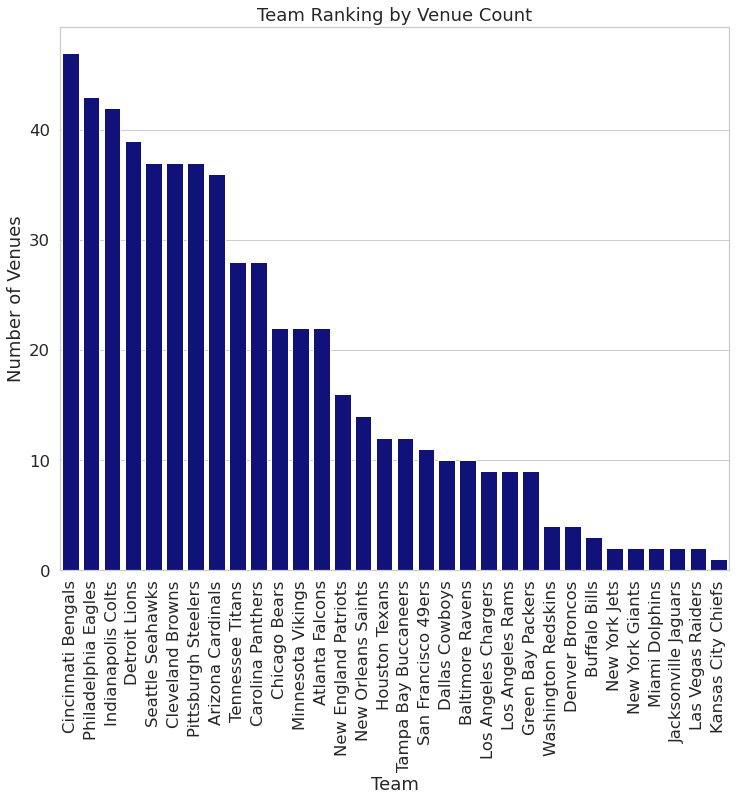

In [62]:
#Plot Ranking by Venue Count
sns.set(rc={'figure.figsize':(12,10)},style="whitegrid", font_scale=1.5)
ax = sns.barplot(x="Team", y="Venue Count",color = 'darkblue', data=ranking_venuecount.reset_index())
ax.set_title('Team Ranking by Venue Count')
ax.set_ylabel('Number of Venues')
ax.set_xlabel('Team')
plt.xticks(rotation=90)

### Venue Distinct Count Rank Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

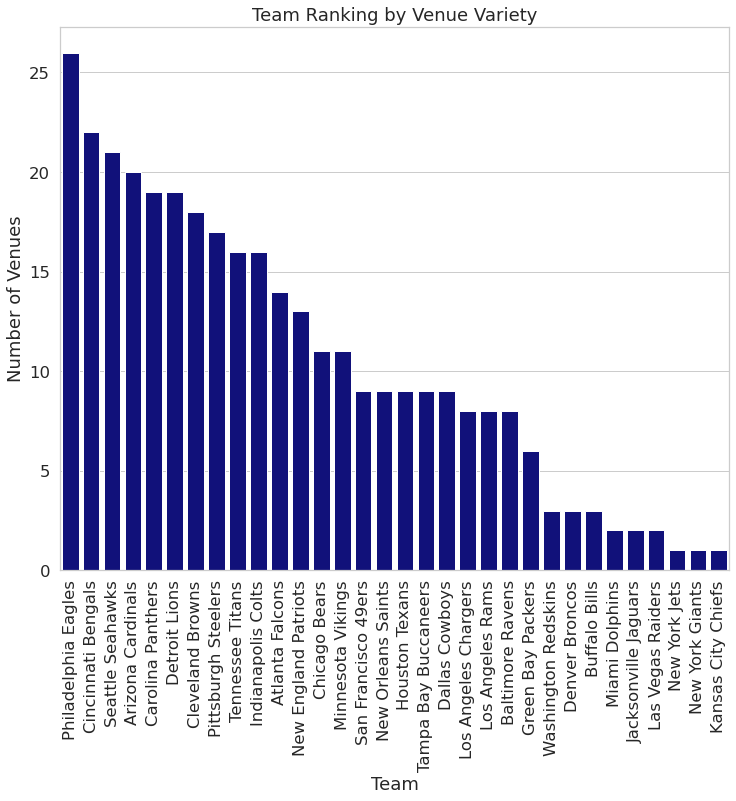

In [63]:
#Plot Ranking by Number or Venues
sns.set(rc={'figure.figsize':(12,10)},style="whitegrid", font_scale=1.5)
ax = sns.barplot(x="Team", y="Venue Distinct",color = 'darkblue', data=ranking_venuedist.reset_index())
ax.set_title('Team Ranking by Venue Variety')
ax.set_ylabel('Number of Venues')
ax.set_xlabel('Team')
plt.xticks(rotation=90)

### Venue Rating Rank Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

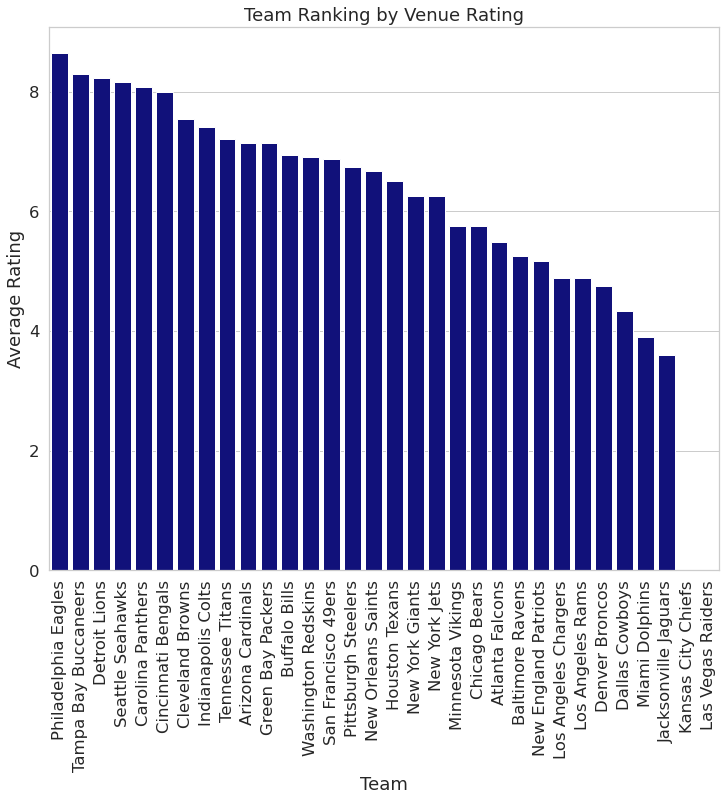

In [64]:
#Plot Ranking by Venues Ratings
sns.set(rc={'figure.figsize':(12,10)},style="whitegrid", font_scale=1.5)
ax = sns.barplot(x="Team", y="Venue Rating Mean",color = 'darkblue', data=ranking_venuerate.reset_index())
ax.set_title('Team Ranking by Venue Rating')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Team')
plt.xticks(rotation=90)

### Overall Rank Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

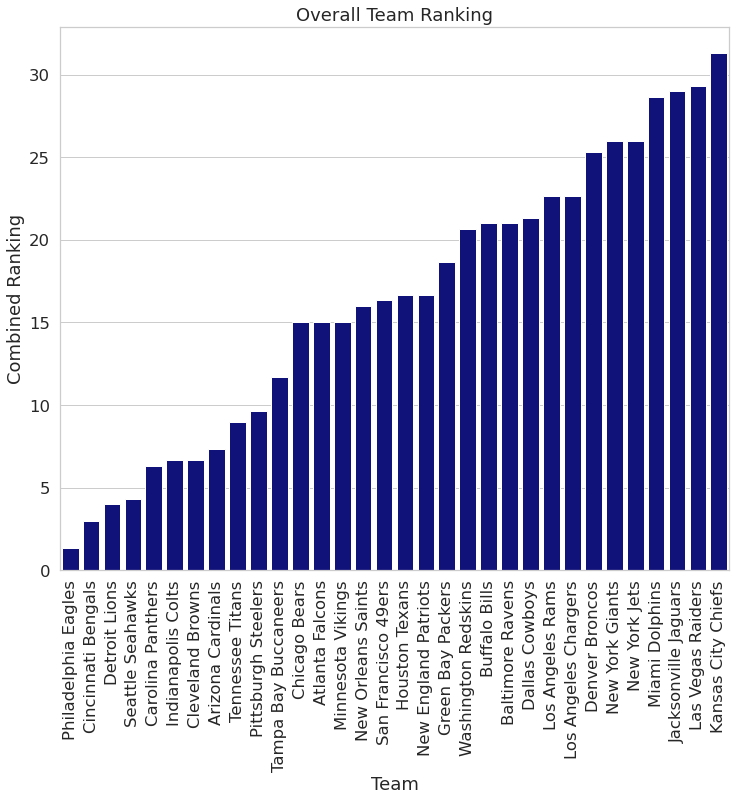

In [65]:
#Plot Ranking by Number or Venues
sns.set(rc={'figure.figsize':(12,10)},style="whitegrid", font_scale=1.5)
ax = sns.barplot(x="Team", y="Avg_rank",color = 'darkblue', data=ranking_avg.reset_index())
ax.set_title('Overall Team Ranking')
ax.set_ylabel('Combined Ranking')
ax.set_xlabel('Team')
plt.xticks(rotation=90)

### Overall Rank Bar Table

In [66]:
rankings_combined=rankings[['Team','Stadium','Avg_rank']].sort_values(by=['Avg_rank'])
rankings_combined.index=np.arange(1,len(rankings_combined)+1)
rankings_combined

,Team,Stadium,Avg_rank
1,Philadelphia Eagles,Lincoln Financial Field,1.33
2,Cincinnati Bengals,Paul Brown Stadium,3.00
3,Detroit Lions,Ford Field,4.00
4,Seattle Seahawks,Lumen Field,4.33
5,Carolina Panthers,Bank of America Stadium,6.33
6,Indianapolis Colts,Lucas Oil Stadium,6.67
7,Cleveland Browns,FirstEnergy Stadium,6.67
8,Arizona Cardinals,Sundevil Football Stadium,7.33
9,Tennessee Titans,Nissan Stadium,9.00
10,Pittsburgh Steelers,Heinz Field,9.67


## Clustering Analysis

In [67]:
#Look at venue counts per team
nearby_food.groupby('Team').count()
#nearby_food

,Divison,Stadium,Capacity,Win Perc,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
Team,,,,,,,,,,,,
Arizona Cardinals,36,36,36,36,36,36,36,36,36,36,36,36
Atlanta Falcons,22,22,22,22,22,22,22,22,22,22,22,22
Baltimore Ravens,10,10,10,10,10,10,10,10,10,10,10,10
Buffalo Bills,3,3,3,3,3,3,3,3,3,3,3,3
Carolina Panthers,28,28,28,28,28,28,28,28,28,28,28,28
Chicago Bears,22,22,22,22,22,22,22,22,22,22,22,22
Cincinnati Bengals,47,47,47,47,47,47,47,47,47,47,47,47
Cleveland Browns,37,37,37,37,37,37,37,37,37,37,37,37
Dallas Cowboys,10,10,10,10,10,10,10,10,10,10,10,10


In [68]:
#Look at total number of Venues
print('There are {} unique categories'.format(nearby_food['Venue Category'].nunique()))

There are 52 unique categories


### Dummify Category Variable suitable for K-Means

In [69]:
# one hot encoding
nearby_food_onehot = pd.get_dummies(nearby_food[['Venue Category']], prefix="", prefix_sep="")

# add team column back to dataframe
nearby_food_onehot['Team'] = nearby_food['Team'] 

# move team column to the first column
fixed_columns = [nearby_food_onehot.columns[-1]] + list(nearby_food_onehot.columns[:-1])
nearby_food_onehot = nearby_food_onehot[fixed_columns]

nearby_food_onehot

,Team,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,...,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Tea Room,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Arizona Cardinals,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arizona Cardinals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona Cardinals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Cardinals,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arizona Cardinals,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Tennessee Titans,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570,Washington Redskins,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571,Washington Redskins,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,Washington Redskins,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group Categories for Frequency

In [80]:
nearby_food_grouped = nearby_food_onehot.groupby('Team').mean().reset_index()

nearby_food_grouped

,Team,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,...,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Tea Room,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Arizona Cardinals,0.055556,0.000000,0.027778,0.000000,0.000000,0.083333,0.027778,0.083333,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000
1,Atlanta Falcons,0.045455,0.000000,0.090909,0.000000,0.000000,0.181818,0.000000,0.000000,0.090909,...,0.045455,0.000000,0.000000,0.090909,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455
2,Baltimore Ravens,0.300000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Buffalo Bills,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Carolina Panthers,0.071429,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.071429,...,0.035714,0.000000,0.000000,0.071429,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000
5,Chicago Bears,0.090909,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,...,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000
6,Cincinnati Bengals,0.042553,0.000000,0.000000,0.000000,0.021277,0.063830,0.000000,0.063830,0.063830,...,0.021277,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.000000
7,Cleveland Browns,0.081081,0.000000,0.054054,0.027027,0.000000,0.000000,0.000000,0.054054,0.081081,...,0.000000,0.000000,0.000000,0.000000,0.081081,0.027027,0.000000,0.000000,0.000000,0.027027
8,Dallas Cowboys,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,...,0.100000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Denver Broncos,0.000000,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
# For initial testing
#Print top venues for each team
#num_top_venues = 5

#for team in nearby_food_grouped['Team']:
#    print("----"+team+"----")
#    temp = nearby_food_grouped[nearby_food_grouped['Team'] == team].T.reset_index()
#    temp.columns = ['venue','freq']
#    temp = temp.iloc[1:]
#    temp['freq'] = temp['freq'].astype(float)
#    temp = temp.round({'freq': 2})
#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#    print('\n')

### Examine Top Venues Categories for Each Stadium

In [84]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [85]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Team']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
teams_venues_sorted = pd.DataFrame(columns=columns)
teams_venues_sorted['Team'] = nearby_food_grouped['Team']
       
        
        
for ind in np.arange(nearby_food_grouped.shape[0]):
    teams_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_food_grouped.iloc[ind, :], num_top_venues)

teams_venues_sorted.head()

,Team,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arizona Cardinals,Pizza Place,Coffee Shop,Burger Joint,Breakfast Spot,American Restaurant,Dessert Shop,Restaurant,Sandwich Place,Mexican Restaurant,Café
1,Atlanta Falcons,Breakfast Spot,Restaurant,BBQ Joint,Café,Southern / Soul Food Restaurant,Wings Joint,Caribbean Restaurant,Fast Food Restaurant,Mexican Restaurant,Pizza Place
2,Baltimore Ravens,American Restaurant,BBQ Joint,Steakhouse,Southern / Soul Food Restaurant,Fast Food Restaurant,Burger Joint,Restaurant,Coffee Shop,Deli / Bodega,Food Court
3,Buffalo Bills,American Restaurant,Hot Dog Joint,Restaurant,Creperie,Food Stand,Food Court,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
4,Carolina Panthers,Pizza Place,Steakhouse,American Restaurant,Southern / Soul Food Restaurant,Coffee Shop,Mexican Restaurant,Café,Italian Restaurant,Hot Dog Joint,Seafood Restaurant


# Run K-Means Cluster 

In [86]:
# Needed to clean Data if run more than once
#teams_venues_sorted.drop(['Cluster Labels'], axis=1, inplace = True)
#teams_venues_sorted

### Determine best number of clusters

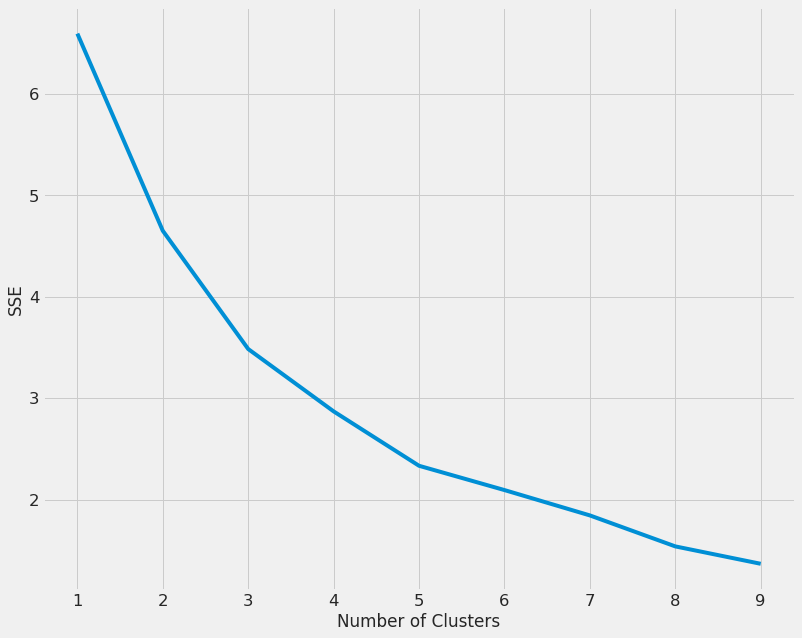

In [91]:
nearby_food_grouped_clustering = nearby_food_grouped.drop('Team', 1)
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
    }

# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(nearby_food_grouped_clustering)
     sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()    


### Run Cluster Routine

In [92]:
# set number of clusters
kclusters = 5

nearby_food_grouped_clustering = nearby_food_grouped.drop('Team', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init =12).fit(nearby_food_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int32)

### Create a new dataframe with clusters and venues

In [93]:
# add clustering labels
teams_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_food_merged = nfl_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
nearby_food_merged = nearby_food_merged.join(teams_venues_sorted.set_index('Team'), on='Team')



ValueError: cannot insert Cluster Labels, already exists

In [94]:
nearby_food_merged

,Team,Division,Stadium,Capacity,WinPerc,Address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287",33.426552,-111.933277,0,Pizza Place,Coffee Shop,Burger Joint,Breakfast Spot,American Restaurant,Dessert Shop,Restaurant,Sandwich Place,Mexican Restaurant,Café
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313",33.751282,-84.399564,0,Breakfast Spot,Restaurant,BBQ Joint,Café,Southern / Soul Food Restaurant,Wings Joint,Caribbean Restaurant,Fast Food Restaurant,Mexican Restaurant,Pizza Place
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230",39.277966,-76.623809,0,American Restaurant,BBQ Joint,Steakhouse,Southern / Soul Food Restaurant,Fast Food Restaurant,Burger Joint,Restaurant,Coffee Shop,Deli / Bodega,Food Court
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127",42.771341,-78.787363,0,American Restaurant,Hot Dog Joint,Restaurant,Creperie,Food Stand,Food Court,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202",35.225835,-80.851772,0,Pizza Place,Steakhouse,American Restaurant,Southern / Soul Food Restaurant,Coffee Shop,Mexican Restaurant,Café,Italian Restaurant,Hot Dog Joint,Seafood Restaurant
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415",44.974242,-93.255780,0,Coffee Shop,Sandwich Place,American Restaurant,BBQ Joint,Seafood Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Mexican Restaurant,Café,Food Truck
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202",39.101454,-84.512460,0,Sandwich Place,Coffee Shop,Café,Restaurant,Breakfast Spot,Burger Joint,American Restaurant,Mexican Restaurant,Pizza Place,Hot Dog Joint
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114",41.505161,-81.693445,0,Coffee Shop,American Restaurant,Steakhouse,Café,Sandwich Place,Mexican Restaurant,BBQ Joint,Burger Joint,Deli / Bodega,Pizza Place
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011",32.752953,-97.087837,0,Steakhouse,American Restaurant,Food Court,Fast Food Restaurant,Breakfast Spot,Seafood Restaurant,Pizza Place,Deli / Bodega,Mexican Restaurant,Creperie
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204",39.743952,-105.019223,3,Asian Restaurant,Pizza Place,Breakfast Spot,Creperie,Food Stand,Food Court,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant


# Visualize Clustering

#### Map Stadiums with Color by Cluster

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, sta, cluster in zip(nearby_food_merged['latitude'], nearby_food_merged['longitude'], nearby_food_merged['Team'], nearby_food_merged['Stadium'], nearby_food_merged['Cluster Labels']):
    label = folium.Popup(str(poi) +str(sta) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 0

In [96]:
#nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 0, nearby_food_merged.columns[[1] + list(range(5, nearby_food_merged.shape[1]))]]
nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 0, nearby_food_merged.columns[[0] + [2] +[9] +[10] +[11] +[12] +[13]]]

,Team,Stadium,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arizona Cardinals,Sundevil Football Stadium,Pizza Place,Coffee Shop,Burger Joint,Breakfast Spot,American Restaurant
1,Atlanta Falcons,Mercedes-Benz Stadium,Breakfast Spot,Restaurant,BBQ Joint,Café,Southern / Soul Food Restaurant
2,Baltimore Ravens,M&T Bank Stadium,American Restaurant,BBQ Joint,Steakhouse,Southern / Soul Food Restaurant,Fast Food Restaurant
3,Buffalo Bills,Bills Stadium,American Restaurant,Hot Dog Joint,Restaurant,Creperie,Food Stand
4,Carolina Panthers,Bank of America Stadium,Pizza Place,Steakhouse,American Restaurant,Southern / Soul Food Restaurant,Coffee Shop
5,Chicago Bears,Soldier Field,Coffee Shop,Sandwich Place,American Restaurant,BBQ Joint,Seafood Restaurant
6,Cincinnati Bengals,Paul Brown Stadium,Sandwich Place,Coffee Shop,Café,Restaurant,Breakfast Spot
7,Cleveland Browns,FirstEnergy Stadium,Coffee Shop,American Restaurant,Steakhouse,Café,Sandwich Place
8,Dallas Cowboys,AT&T Stadium,Steakhouse,American Restaurant,Food Court,Fast Food Restaurant,Breakfast Spot
10,Detroit Lions,Ford Field,Coffee Shop,American Restaurant,Burger Joint,Café,Steakhouse


# Cluster 1

In [97]:
nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 1, nearby_food_merged.columns[[0] + [2] +[9] +[10] +[11] +[12] +[13]]]
#nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 1, nearby_food_merged.columns[[1] + list(range(5, nearby_food_merged.shape[1]))]]

,Team,Stadium,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,New York Giants,MetLife Stadium,Donut Shop,Wings Joint,Vegetarian / Vegan Restaurant,Food Truck,Food Stand
24,New York Jets,MetLife Stadium,Donut Shop,Wings Joint,Vegetarian / Vegan Restaurant,Food Truck,Food Stand


# Cluster 2

In [98]:
#nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 2, nearby_food_merged.columns[[1] + list(range(5, nearby_food_merged.shape[1]))]]
nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 2, nearby_food_merged.columns[[0] + [2] +[9] +[10] +[11] +[12] +[13]]]

,Team,Stadium,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Kansas City Chiefs,Arrowhead Stadium,BBQ Joint,Wings Joint,Deli / Bodega,Food Truck,Food Stand
16,Las Vegas Raiders,Allegiant Stadium,BBQ Joint,Café,Wings Joint,Deli / Bodega,Food Truck


# Cluster 3

In [99]:
nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 3, nearby_food_merged.columns[[0] + [2] +[9] +[10] +[11] +[12] +[13]]]
#nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 3, nearby_food_merged.columns[[1] + list(range(5, nearby_food_merged.shape[1]))]]

,Team,Stadium,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Denver Broncos,Empower Field at Mile High,Asian Restaurant,Pizza Place,Breakfast Spot,Creperie,Food Stand
19,Miami Dolphins,Hard Rock Stadium,American Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Food Truck,Food Stand
31,Washington Redskins,FedExField,Fast Food Restaurant,American Restaurant,Pizza Place,BBQ Joint,Deli / Bodega


# Cluster 4

In [100]:
nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 4, nearby_food_merged.columns[[0] + [2] +[9] +[10] +[11] +[12] +[13]]]
#nearby_food_merged.loc[nearby_food_merged['Cluster Labels'] == 5, nearby_food_merged.columns[[1] + list(range(5, nearby_food_merged.shape[1]))]]

,Team,Stadium,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Jacksonville Jaguars,TIAA Bank Field,Food Truck,Breakfast Spot,Wings Joint,Deli / Bodega,Food Stand


# Correlation Analysis

In [101]:
# Show Rankings
rankings

,Team,Stadium,Venue Count,Venue Distinct,Venue Rating Mean,Venue Count_rank,Venue Distinct_rank,Venue Rating_rank,Avg_rank
0,Arizona Cardinals,Sundevil Football Stadium,36,20,7.144444,8,4,10,7.33
1,Atlanta Falcons,Mercedes-Benz Stadium,22,14,5.486364,12,11,22,15.00
2,Baltimore Ravens,M&T Bank Stadium,10,8,5.260000,19,21,23,21.00
3,Buffalo Bills,Bills Stadium,3,3,6.933333,26,25,12,21.00
4,Carolina Panthers,Bank of America Stadium,28,19,8.075000,9,5,5,6.33
5,Chicago Bears,Soldier Field,22,11,5.745455,12,13,20,15.00
6,Cincinnati Bengals,Paul Brown Stadium,47,22,7.993617,1,2,6,3.00
7,Cleveland Browns,FirstEnergy Stadium,37,18,7.543243,6,7,7,6.67
8,Dallas Cowboys,AT&T Stadium,10,9,4.340000,19,17,28,21.33
9,Denver Broncos,Empower Field at Mile High,4,3,4.750000,24,25,27,25.33


In [102]:
#Show Team Info
nfl_df

,Team,Division,Stadium,Capacity,WinPerc,Address,latitude,longitude
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287",33.426552,-111.933277
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313",33.751282,-84.399564
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230",39.277966,-76.623809
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127",42.771341,-78.787363
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202",35.225835,-80.851772
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415",44.974242,-93.255780
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202",39.101454,-84.512460
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114",41.505161,-81.693445
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011",32.752953,-97.087837
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204",39.743952,-105.019223


In [103]:
# Merge Team Info and Rankings 
nfl_rankings = pd.merge(nfl_df, rankings, how="left", on='Team')
nfl_rankings

,Team,Division,Stadium_x,Capacity,WinPerc,Address,latitude,longitude,Stadium_y,Venue Count,Venue Distinct,Venue Rating Mean,Venue Count_rank,Venue Distinct_rank,Venue Rating_rank,Avg_rank
0,Arizona Cardinals,NFC West,Sundevil Football Stadium,"63,400",34.03%,"500 E Veterans Way, Tempe, AZ 85287",33.426552,-111.933277,Sundevil Football Stadium,36,20,7.144444,8,4,10,7.33
1,Atlanta Falcons,NFC South,Mercedes-Benz Stadium,"71,000",49.57%,"409 Nelson St SW, Atlanta, GA 30313",33.751282,-84.399564,Mercedes-Benz Stadium,22,14,5.486364,12,11,22,15.00
2,Baltimore Ravens,AFC North,M&T Bank Stadium,"71,008",65.77%,"1101 Russell Street, Baltimore, MD 21230",39.277966,-76.623809,M&T Bank Stadium,10,8,5.260000,19,21,23,21.00
3,Buffalo Bills,AFC East,Bills Stadium,"71,608",49.73%,"One Bills Drive, Orchard Park, NY 14127",42.771341,-78.787363,Bills Stadium,3,3,6.933333,26,25,12,21.00
4,Carolina Panthers,NFC South,Bank of America Stadium,"75,523",46.57%,"800 South Mint Street, Charlotte, NC 28202",35.225835,-80.851772,Bank of America Stadium,28,19,8.075000,9,5,5,6.33
5,Chicago Bears,NFC North,Soldier Field,"61,500",50.60%,"1005 S 4th St, Minneapolis, MN 55415",44.974242,-93.255780,Soldier Field,22,11,5.745455,12,13,20,15.00
6,Cincinnati Bengals,AFC North,Paul Brown Stadium,"65,515",31.27%,"Cincinnati, OH 45202",39.101454,-84.512460,Paul Brown Stadium,47,22,7.993617,1,2,6,3.00
7,Cleveland Browns,AFC North,FirstEnergy Stadium,"67,895",28.07%,"Cleveland, OH 44114",41.505161,-81.693445,FirstEnergy Stadium,37,18,7.543243,6,7,7,6.67
8,Dallas Cowboys,NFC East,AT&T Stadium,"80,000",55.77%,"One AT&T Way, Arlington, TX 76011",32.752953,-97.087837,AT&T Stadium,10,9,4.340000,19,17,28,21.33
9,Denver Broncos,AFC West,Empower Field at Mile High,"76,125",37.50%,"1701 Bryant St, Denver, CO 80204",39.743952,-105.019223,Empower Field at Mile High,4,3,4.750000,24,25,27,25.33


In [104]:
#Clean up data values to remove new line characters
nfl_rankings['WinPerc'] = nfl_rankings['WinPerc'].replace(r'%','', regex=True) 
nfl_rankings['Capacity'] = nfl_rankings['Capacity'].replace(r',','', regex=True) 

nfl_rankings['Capacity'] = nfl_rankings['Capacity'].astype(float)
nfl_rankings['WinPerc'] = nfl_rankings['WinPerc'].astype(float)

### Examine for any Correlations

In [105]:
nfl_rankings.corr()

,Capacity,WinPerc,latitude,longitude,Venue Count,Venue Distinct,Venue Rating Mean,Venue Count_rank,Venue Distinct_rank,Venue Rating_rank,Avg_rank
Capacity,1.000000,-0.036977,0.073684,0.217362,-0.490841,-0.469954,-0.060476,0.489968,0.507445,0.142774,0.409787
WinPerc,-0.036977,1.000000,0.106091,-0.097814,0.004323,0.122606,-0.154065,-0.093653,-0.124062,0.199769,-0.007311
latitude,0.073684,0.106091,1.000000,0.063016,0.297445,0.216691,0.215524,-0.248613,-0.210003,-0.270606,-0.261343
longitude,0.217362,-0.097814,0.063016,1.000000,0.053912,-0.000906,0.247048,-0.055319,0.021951,-0.196228,-0.081623
Venue Count,-0.490841,0.004323,0.297445,0.053912,1.000000,0.957622,0.625019,-0.965880,-0.946068,-0.706113,-0.939391
Venue Distinct,-0.469954,0.122606,0.216691,-0.000906,0.957622,1.000000,0.641313,-0.961507,-0.986148,-0.700947,-0.950496
Venue Rating Mean,-0.060476,-0.154065,0.215524,0.247048,0.625019,0.641313,1.000000,-0.692104,-0.653009,-0.897907,-0.803550
Venue Count_rank,0.489968,-0.093653,-0.248613,-0.055319,-0.965880,-0.961507,-0.692104,1.000000,0.977130,0.718877,0.967372
Venue Distinct_rank,0.507445,-0.124062,-0.210003,0.021951,-0.946068,-0.986148,-0.653009,0.977130,1.000000,0.691004,0.957556
Venue Rating_rank,0.142774,0.199769,-0.270606,-0.196228,-0.706113,-0.700947,-0.897907,0.718877,0.691004,1.000000,0.863259


(array([20., 30., 40., 50., 60., 70., 80.]),
 <a list of 7 Text major ticklabel objects>)

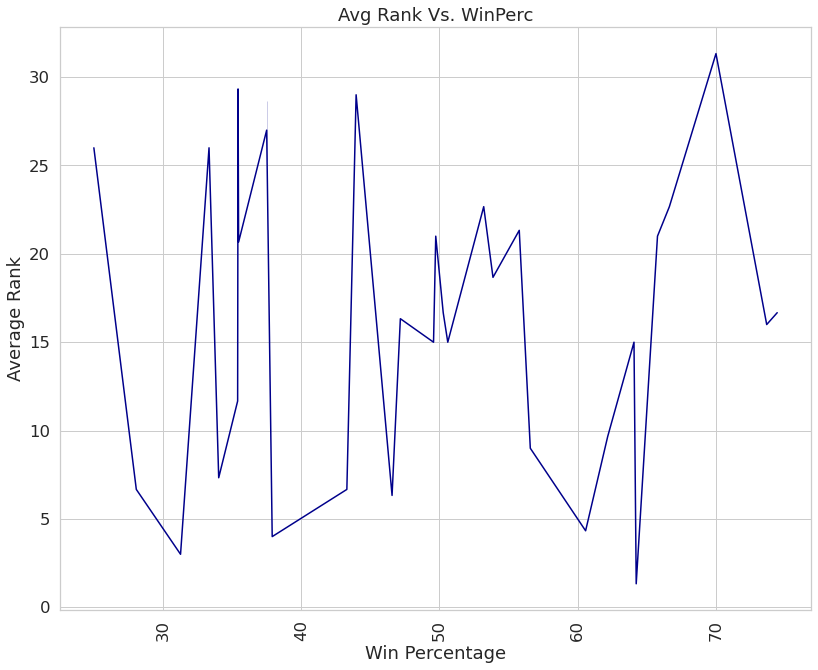

In [106]:
#Plot Avg_Rank by Win Perc
sns.set(rc={'figure.figsize':(12,10)},style="whitegrid", font_scale=1.5)
ax = sns.lineplot(x="WinPerc", y="Avg_rank",color = 'darkblue', data=nfl_rankings)
ax.set_title('Avg Rank Vs. WinPerc')
ax.set_ylabel('Average Rank')
ax.set_xlabel('Win Percentage')
plt.xticks(rotation=90)

(array([20., 30., 40., 50., 60., 70., 80.]),
 <a list of 7 Text major ticklabel objects>)

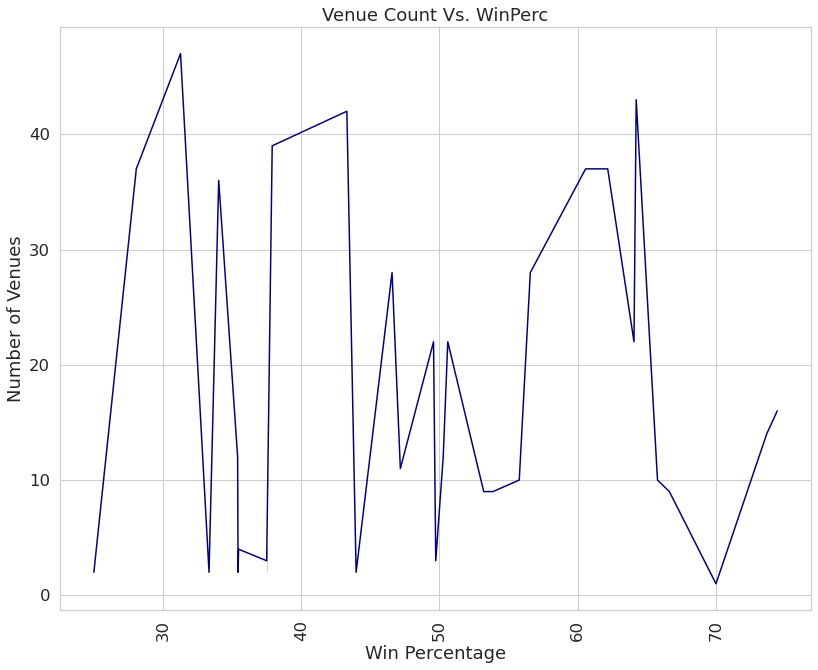

In [107]:
#Plot Venue Count by Win Perc
sns.set(rc={'figure.figsize':(12,10)},style="whitegrid", font_scale=1.5)
ax = sns.lineplot(x="WinPerc", y="Venue Count",color = 'darkblue', data=nfl_rankings)
ax.set_title('Venue Count Vs. WinPerc')
ax.set_ylabel('Number of Venues')
ax.set_xlabel('Win Percentage')
plt.xticks(rotation=90)